In [21]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils  import pad_sequences

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,Embedding,SimpleRNN,Bidirectional,LSTM,GRU


In [22]:
imdb,info = tfds.load('imdb_reviews',with_info=True,as_supervised=True)

In [23]:
imdb

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'unsupervised': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [24]:
imdb

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'unsupervised': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [25]:
train_data,test_data = imdb['train'],imdb['test']

In [26]:
#creating and testing datasets

training_sentences = []
testing_sentences = []
training_labels = []
testing_labels = []

for s,l in train_data:
  # print(s)
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())



In [27]:
testing_labels[0]

np.int64(1)

In [28]:
len(training_sentences),len(testing_sentences)

(25000, 25000)

In [29]:
len(training_labels),len(testing_labels)


(25000, 25000)

In [30]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)


<h1>Preprocessing</h1>

In [31]:
help(Tokenizer)

Help on class Tokenizer in module keras.src.legacy.preprocessing.text:

class Tokenizer(builtins.object)
 |  Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, analyzer=None, **kwargs)
 |
 |  DEPRECATED.
 |
 |  Methods defined here:
 |
 |  __init__(self, num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, analyzer=None, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  fit_on_sequences(self, sequences)
 |
 |  fit_on_texts(self, texts)
 |
 |  get_config(self)
 |
 |  sequences_to_matrix(self, sequences, mode='binary')
 |
 |  sequences_to_texts(self, sequences)
 |
 |  sequences_to_texts_generator(self, sequences)
 |
 |  texts_to_matrix(self, texts, mode='binary')
 |
 |  texts_to_sequences(self, texts)
 |
 |  texts_to_sequences_generator(self, texts)
 |
 |  to_json(self, **kwargs)
 |
 |  ------------------

In [32]:
tokenizer = Tokenizer(num_words=10000)

In [33]:
type(testing_sentences[0])

str

In [34]:
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 "'s": 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'are': 24,
 'his': 25,
 'he': 26,
 'have': 27,
 'be': 28,
 'one': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'they': 33,
 'an': 34,
 'who': 35,
 'so': 36,
 'from': 37,
 'like': 38,
 'her': 39,
 "'t": 40,
 'or': 41,
 'just': 42,
 'there': 43,
 'about': 44,
 'out': 45,
 "'": 46,
 'has': 47,
 'if': 48,
 'some': 49,
 'what': 50,
 'good': 51,
 'more': 52,
 'very': 53,
 'when': 54,
 'she': 55,
 'up': 56,
 'can': 57,
 'b': 58,
 'time': 59,
 'no': 60,
 'even': 61,
 'my': 62,
 'would': 63,
 'which': 64,
 'story': 65,
 'only': 66,
 'really': 67,
 'see': 68,
 'their': 69,
 'had': 70,
 'were': 71,
 'me': 72,
 'well': 73,
 'we': 74,
 'than': 75,
 'much': 76,
 'been': 77,
 'get': 78,
 'bad': 79,
 'will': 80,
 'people': 81,
 'do': 82,
 'also': 83,


In [35]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=500,truncating='post',padding='post')
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=500,truncating='post',padding='post')


<h1>Building Model</h1>

In [36]:
model_rnn = Sequential([
    Embedding(10000,50,input_length = 500),
    SimpleRNN(32),
    Dense(10,activation = 'relu'),
    Dense(1,activation = "sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [37]:
model_rnn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
history = model_rnn.fit(padded,training_labels,epochs=10,validation_data=(testing_padded,testing_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.5020 - loss: 0.6957 - val_accuracy: 0.4998 - val_loss: 0.6955
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.5043 - loss: 0.6951 - val_accuracy: 0.5023 - val_loss: 0.6934
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5020 - loss: 0.6943 - val_accuracy: 0.5045 - val_loss: 0.6930
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.5121 - loss: 0.6926 - val_accuracy: 0.5042 - val_loss: 0.6935
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5120 - loss: 0.6911 - val_accuracy: 0.5102 - val_loss: 0.6945
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5271 - loss: 0.6873 - val_accuracy: 0.5084 - val_loss: 0.6961
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5281 - loss: 0.6761 - val_accuracy: 0.5058 - val_loss: 0.6995
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.5330 - loss: 0.6612 - 

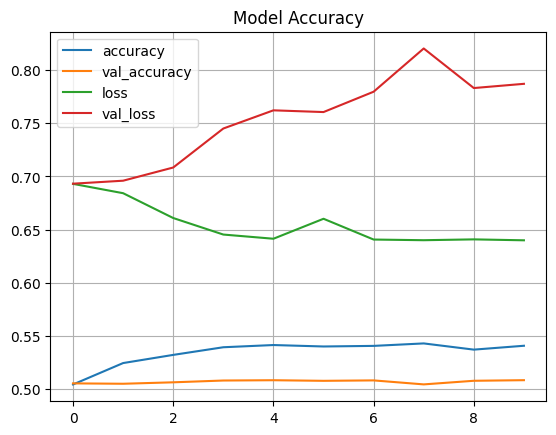

In [42]:
plt.plot(history.history["accuracy"],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.title('Model Accuracy')
plt.grid()
plt.legend()


<h1>Building LSTM Model</h1>

In [43]:
model_lstm = Sequential([
    Embedding(10000,50,input_length = 500),
    LSTM(32),
    Dense(10,activation = 'relu'),
    Dense(1,activation = "sigmoid")
])

model_lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [44]:
history_lstm = model_lstm.fit(padded,training_labels,epochs=10,validation_data=(testing_padded,testing_labels))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.4946 - loss: 0.6933 - val_accuracy: 0.5012 - val_loss: 0.6928
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5176 - loss: 0.6882 - val_accuracy: 0.5102 - val_loss: 0.6902
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5259 - loss: 0.6618 - val_accuracy: 0.5088 - val_loss: 0.7028
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.5407 - loss: 0.6457 - val_accuracy: 0.5084 - val_loss: 0.7313
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5410 - loss: 0.6404 - val_accuracy: 0.5112 - val_loss: 0.7460
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5461 - loss: 0.6386 - val_accuracy: 0.5099 - val_loss: 0.7465
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6444 - loss: 0.6096 - val_accuracy: 0.7813 - val_loss: 0.5102
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8387 - loss: 0.4058 - 

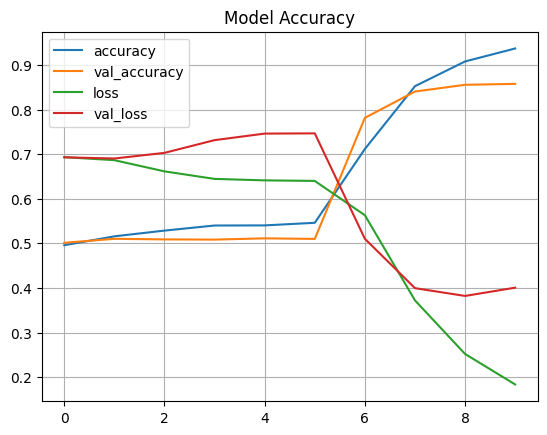

In [45]:
plt.plot(history_lstm.history["accuracy"],label = 'accuracy')
plt.plot(history_lstm.history['val_accuracy'],label = 'val_accuracy')
plt.plot(history_lstm.history['loss'],label = 'loss')
plt.plot(history_lstm.history['val_loss'],label = 'val_loss')
plt.title('Model Accuracy')
plt.grid()
plt.legend()

<h1>Building model with gru</h1>

In [46]:
model_gru = Sequential([
    Embedding(10000,50,input_length = 500),
    GRU(32),
    Dense(10,activation = 'relu'),
    Dense(1,activation = "sigmoid")
])

model_gru.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [47]:
history_gru = model_gru.fit(padded,training_labels,epochs=10,validation_data=(testing_padded,testing_labels))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.5049 - val_loss: 0.6929
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5130 - loss: 0.6876 - val_accuracy: 0.5098 - val_loss: 0.6968
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.5313 - loss: 0.6643 - val_accuracy: 0.5080 - val_loss: 0.7130
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5297 - loss: 0.6482 - val_accuracy: 0.5086 - val_loss: 0.7319
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5326 - loss: 0.6434 - val_accuracy: 0.5078 - val_loss: 0.7524
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5429 - loss: 0.6410 - val_accuracy: 0.5086 - val_loss: 0.7742
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6591 - loss: 0.5881 - val_accuracy: 0.8371 - val_loss: 0.4840
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.8862 - loss: 0.3548 - 

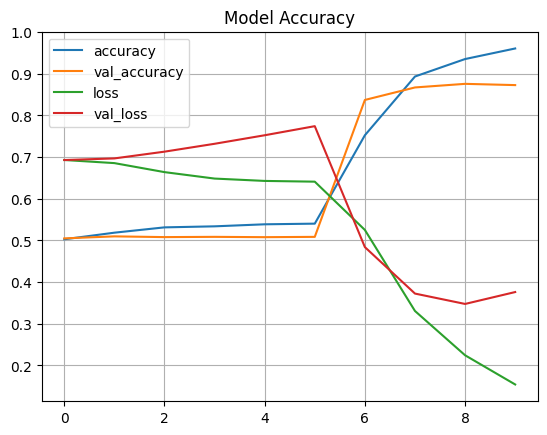

In [49]:
plt.plot(history_gru.history["accuracy"],label = 'accuracy')
plt.plot(history_gru.history['val_accuracy'],label = 'val_accuracy')
plt.plot(history_gru.history['loss'],label = 'loss')
plt.plot(history_gru.history['val_loss'],label = 'val_loss')
plt.title('Model Accuracy')
plt.grid()
plt.legend()

<h1>Prediction</h1>

In [54]:
new1 = 'This was worst movie. I regret wasting my money on it.'
new2 = 'This is must watch movie. Definitely recommend watching it again.'



In [57]:
from IPython.core.displayhook import tokenize
def predict_news(text):
  sequences = tokenizer.texts_to_sequences([text])
  padded = pad_sequences(sequences,maxlen=500,padding='post')
  return model_gru.predict(padded)
predict_news(new1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


array([[0.04844426]], dtype=float32)